## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. 

They have shared purchase summary of various customers for selected high volume products from last month. 
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('blackfriday_train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
test = pd.read_csv('blackfriday_test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
print("Train: ", train.shape, "Test: " , test.shape)

Train:  (550068, 12) Test:  (233599, 11)


In [5]:
# Merge data. Only for Kaggle competitions always merge train and test data. 
#df = train.concat(test)

df = train.append(test)
df.shape

C:\Users\MSI Leopard Pro\AppData\Local\Temp\ipykernel_10608\817690646.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


(783667, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df.drop(['User_ID'], axis = 1 ,inplace= True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## One way to convert categorical data to numerical using "Get Dummies" method.
    - df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

## Handling categorical feature "Gender"

In [12]:
# Second way to convert categorical data to numerical using ".map" method

df['Gender'] = df['Gender'].map({'F' : 0, 'M': 1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
## Handling categorical feature "Age"

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
#pd.get_dummies(df['Age'],drop_first=True)

df['Age'] = df['Age'].map({'0-17': 1,'18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6,'55+': 7})
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [18]:
# Another technique to convert categorical data to numerical

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Age'.
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [20]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [21]:
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [22]:
df = pd.concat([df,df_city], axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [23]:
df.drop('City_Category', axis = 1, inplace=True)
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,2,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,4,1,4+,0,10,16.0,NaN,NaN,0,1


In [26]:
# Missing Values 
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [27]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [28]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [29]:
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [30]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [32]:
df['Product_Category_2'].mode()[0]

8.0

In [33]:
df['Product_Category_2'].mean()

9.844505612021909

In [34]:
df['Product_Category_2'].median()

9.0

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

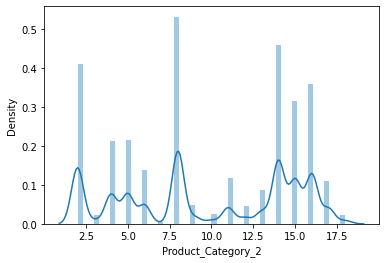

In [39]:
sns.distplot(df['Product_Category_2'])

## Missing Values Imputation

In [40]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [41]:
df['Product_Category_2'].isnull().sum()

0

In [42]:
df['Product_Category_3'].isnull().sum()

545809

In [43]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [44]:
df['Product_Category_3'].isnull().sum()

0

In [45]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+' , '')

C:\Users\MSI Leopard Pro\AppData\Local\Temp\ipykernel_10608\1490148161.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+' , '')


In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [49]:
# "Stay in current city years" is of object datatype, which needs to be converted to int

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [50]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

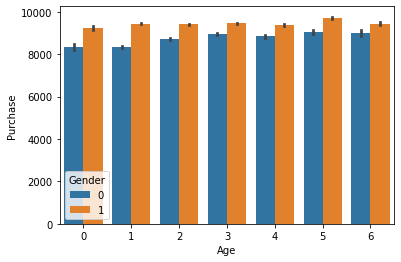

In [51]:
sns.barplot('Age', 'Purchase', hue = 'Gender', data = df)

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

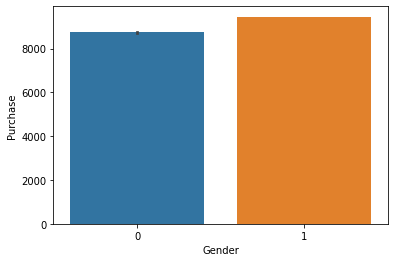

In [52]:
sns.barplot('Gender', 'Purchase', data = df)

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

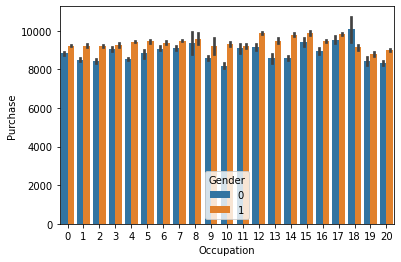

In [53]:
sns.barplot('Occupation', 'Purchase', hue = 'Gender', data = df)

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

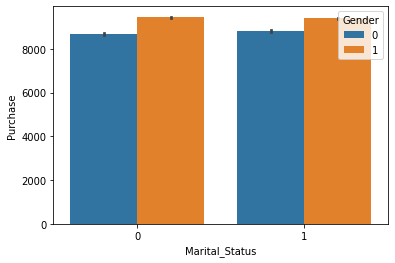

In [54]:
sns.barplot('Marital_Status', 'Purchase', hue = 'Gender', data = df)

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

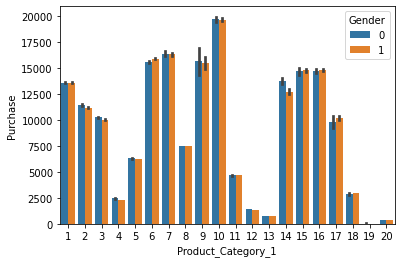

In [55]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

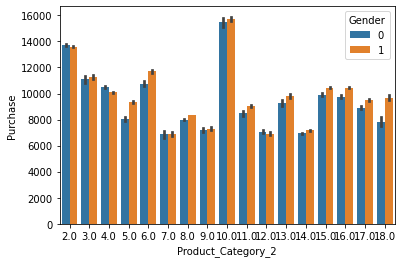

In [56]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

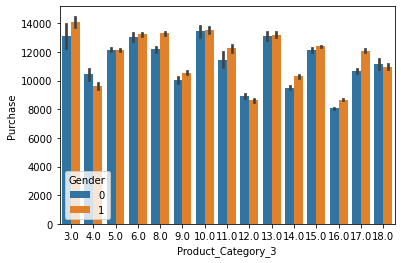

In [57]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

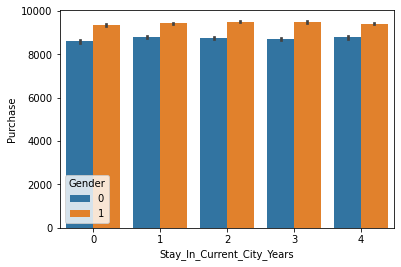

In [58]:
sns.barplot('Stay_In_Current_City_Years','Purchase',hue='Gender',data=df)

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='B', ylabel='Purchase'>

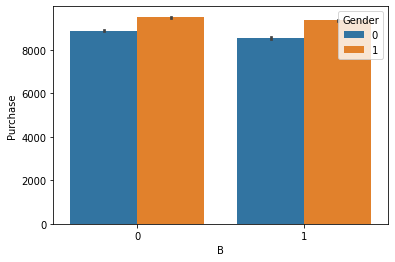

In [59]:
sns.barplot('B','Purchase',hue='Gender',data=df)

C:\Users\MSI Leopard Pro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='C', ylabel='Purchase'>

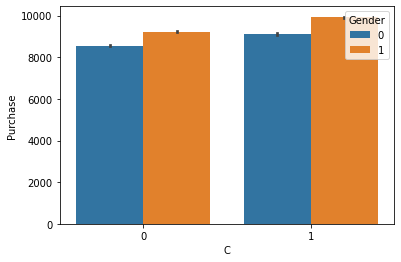

In [60]:
sns.barplot('C','Purchase',hue='Gender',data=df)

In [66]:
# Split data for Feature Scaling
#Assigning all the data that doesnt have Purchase column to test data, just as it was originally.

df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

In [68]:
df_train.shape

(550068, 12)

In [69]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [70]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,3,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,3,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [71]:
df_test.shape

(233599, 12)

## Input Split

In [72]:
X = df_train.drop('Purchase', axis = 1)

In [73]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,0,1


In [75]:
X.shape

(550068, 11)

In [76]:
y = df_train['Purchase']

In [77]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [78]:
y.shape

(550068,)

## Train - Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 100)

In [81]:
x_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
507905,P00297642,1,4,13,1,0,8,8.0,16.0,1,0
260565,P00266142,1,0,10,1,0,5,11.0,16.0,0,1
10003,P00221442,1,2,4,1,1,1,2.0,5.0,0,0
40910,P00162442,1,2,7,4,1,1,16.0,16.0,1,0
174002,P00303342,0,1,2,1,0,1,16.0,16.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
344414,P00344342,1,3,6,2,1,8,14.0,16.0,1,0
212912,P00173842,1,1,14,0,0,1,2.0,15.0,1,0
65615,P00073842,1,3,15,3,1,1,15.0,17.0,1,0
210755,P00286642,1,2,15,2,0,11,14.0,16.0,1,0


In [82]:
x_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
343184,P00278442,1,3,0,1,1,11,8.0,16.0,0,0
544675,P00350942,0,3,7,4,1,3,4.0,5.0,0,0
433588,P00117842,0,2,3,1,0,5,13.0,16.0,1,0
123193,P00034642,1,0,10,1,0,4,5.0,16.0,0,1
161124,P00251842,1,2,15,2,1,1,15.0,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
131812,P00271542,1,5,11,1,1,18,8.0,16.0,1,0
223479,P00288942,1,3,7,1,0,1,2.0,5.0,1,0
79803,P00059442,1,6,1,1,1,6,8.0,16.0,0,1
343164,P00221642,1,2,17,2,0,5,15.0,16.0,0,1


In [83]:
y_train

507905     6192.0
260565     6913.0
10003     15815.0
40910      7730.0
174002    15732.0
           ...   
344414     7907.0
212912    19065.0
65615     15284.0
210755     4494.0
56088      7048.0
Name: Purchase, Length: 412551, dtype: float64

In [84]:
y_test

343184     3051.0
544675    13692.0
433588     8592.0
123193     2761.0
161124    15918.0
           ...   
131812     2294.0
223479    11709.0
79803     16533.0
343164     5299.0
399770     7127.0
Name: Purchase, Length: 137517, dtype: float64

In [85]:
x_train.drop('Product_ID', axis = 1, inplace = True)

In [86]:
x_test.drop('Product_ID', axis = 1, inplace = True)

In [87]:
x_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
507905,1,4,13,1,0,8,8.0,16.0,1,0
260565,1,0,10,1,0,5,11.0,16.0,0,1
10003,1,2,4,1,1,1,2.0,5.0,0,0
40910,1,2,7,4,1,1,16.0,16.0,1,0
174002,0,1,2,1,0,1,16.0,16.0,1,0
...,...,...,...,...,...,...,...,...,...,...
344414,1,3,6,2,1,8,14.0,16.0,1,0
212912,1,1,14,0,0,1,2.0,15.0,1,0
65615,1,3,15,3,1,1,15.0,17.0,1,0
210755,1,2,15,2,0,11,14.0,16.0,1,0


In [88]:
x_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
343184,1,3,0,1,1,11,8.0,16.0,0,0
544675,0,3,7,4,1,3,4.0,5.0,0,0
433588,0,2,3,1,0,5,13.0,16.0,1,0
123193,1,0,10,1,0,4,5.0,16.0,0,1
161124,1,2,15,2,1,1,15.0,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...
131812,1,5,11,1,1,18,8.0,16.0,1,0
223479,1,3,7,1,0,1,2.0,5.0,1,0
79803,1,6,1,1,1,6,8.0,16.0,0,1
343164,1,2,17,2,0,5,15.0,16.0,0,1


## Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc = StandardScaler()

In [93]:
x_train = sc.fit_transform(x_train)

In [94]:
x_test = sc.transform(x_test)

## Model Training

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, mean_absolute_error

In [99]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
y_pred_lr[0:3]

array([ 6678.05520716, 11199.98349927,  8686.7256433 ])

In [100]:
print("R Squared: " , r2_score(y_test,y_pred_lr))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred_lr))
print("Mean Squared Error: ", mse(y_test,y_pred_lr))
print("Root Mean Squared Error LR : %.4g" % (np.sqrt(mse(y_test,y_pred_lr))))

R Squared:  0.13081680229008974
Mean Absolute Error:  3582.3755618698883
Mean Squared Error:  21937087.30612562
Root Mean Squared Error LR without CV: 4684


In [104]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.05)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)

print("R Squared: " , r2_score(y_test,y_pred_ridge))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred_ridge))
print("Mean Squared Error: ", mse(y_test,y_pred_ridge))
print("Root Mean Squared Error of Ridge Regression: %.4g" % np.sqrt(mse(y_test,y_pred_ridge)))

R Squared:  0.13081680242828042
Mean Absolute Error:  3582.3755901906165
Mean Squared Error:  21937087.30263786
Root Mean Squared Error of Ridge Regression without CV : 4684


In [105]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.05)
lasso.fit(x_train,y_train)

y_pred_lasso = lasso.predict(x_test)

print("R Squared: " , r2_score(y_test,y_pred_lasso))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred_lasso))
print("Mean Squared Error: ", mse(y_test,y_pred_lasso))
print("Root Mean Squared Error of Lasso Regression: %.4g" % np.sqrt(mse(y_test,y_pred_lasso)))

R Squared:  0.1308168509818095
Mean Absolute Error:  3582.379123508532
Mean Squared Error:  21937086.077208042
Root Mean Squared Error of Lasso Regression without CV: 4684


In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
cv_score_ridge = cross_val_score(ridge,x_train,y_train, scoring='neg_mean_squared_error', cv=10)
cv_score_ridge

array([-22171897.7199135 , -21501726.77458049, -22228475.85267026,
       -21917504.45610364, -21693576.64446018, -21984576.51880055,
       -21760746.14701905, -21872574.86762379, -21839954.51473922,
       -22180628.69597797])

In [109]:
avg_cv_score = np.mean(cv_score_ridge)
avg_cv_score

-21915166.21918886

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [113]:
y_pred_rf = rf.predict(x_test)

In [112]:
y_test

343184     3051.0
544675    13692.0
433588     8592.0
123193     2761.0
161124    15918.0
           ...   
131812     2294.0
223479    11709.0
79803     16533.0
343164     5299.0
399770     7127.0
Name: Purchase, Length: 137517, dtype: float64

In [115]:
print("R Squared: " , r2_score(y_test,y_pred_rf))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred_rf))
print("Mean Squared Error: ", mse(y_test,y_pred_rf))
print("Root Mean Squared Error of Random Forest Regressor: %.4g" % np.sqrt(mse(y_test,y_pred_rf)))

R Squared:  0.6314663376069884
Mean Absolute Error:  2217.2175165888443
Mean Squared Error:  9301324.678689817
Root Mean Squared Error of Random Forest Regressor: 3050
